In [1]:

import pandas as pd
import numpy as np
from sklearn.preprocessing import PolynomialFeatures
from sklearn.linear_model import LinearRegression, Ridge,Lasso,ElasticNet
from sklearn.svm import SVR
from sklearn.ensemble import RandomForestRegressor
from sklearn.ensemble import GradientBoostingRegressor
from sklearn.neural_network import MLPRegressor
from sklearn.neighbors import KNeighborsRegressor
from sklearn.metrics import mean_squared_error, r2_score
import statsmodels.api as sm
import matplotlib.pyplot as plt
from tqdm import tqdm
from sklearn.preprocessing import StandardScaler
import seaborn as sns
from sklearn.decomposition import PCA


In [2]:
train_file_path = 'wind.csv'
test_file_path='wind_locations.csv'
df = pd.read_csv(train_file_path,sep=",")
df=df.drop(columns='power_ninth_decile')
df

,lat,long,h,wind_min,wind_max,power_max
0,27.0,77.0,150,9.48,9.51,1001.65
1,23.5,72.5,150,9.28,9.29,958.17
2,22.5,76.5,10,7.23,7.24,495.63
3,26.5,80.5,150,8.42,8.55,802.74
4,23.0,73.0,100,9.05,9.07,899.76
...,...,...,...,...,...,...
1588,11.0,78.5,10,3.10,14.45,5168.82
1589,29.0,78.5,200,9.17,9.20,1008.99
1590,13.5,75.5,150,9.34,9.38,1070.42
1591,17.5,76.5,150,9.14,9.54,1040.16


In [7]:
df.describe()

,lat,long,h,wind_min,wind_max,power_max
count,1593.000000,1593.000000,1593.000000,1593.000000,1593.000000,1593.000000
mean,22.086943,76.961707,100.376648,7.982969,8.642097,939.625210
std,5.619237,2.364900,68.305836,1.596089,1.445673,643.331077
min,10.000000,72.000000,10.000000,1.610000,3.330000,150.420000
25%,18.500000,75.500000,50.000000,7.120000,7.680000,658.470000
50%,22.000000,77.000000,100.000000,8.400000,8.730000,858.950000
75%,26.000000,78.500000,150.000000,9.240000,9.370000,1009.760000
max,35.500000,81.500000,200.000000,11.630000,17.240000,8860.060000


In [8]:
nan_counts = df.isna().sum()
print("Count of NaN values in each column:")
print(nan_counts)

Count of NaN values in each column:
lat          0
long         0
h            0
wind_min     0
 wind_max    0
power_max    0
dtype: int64


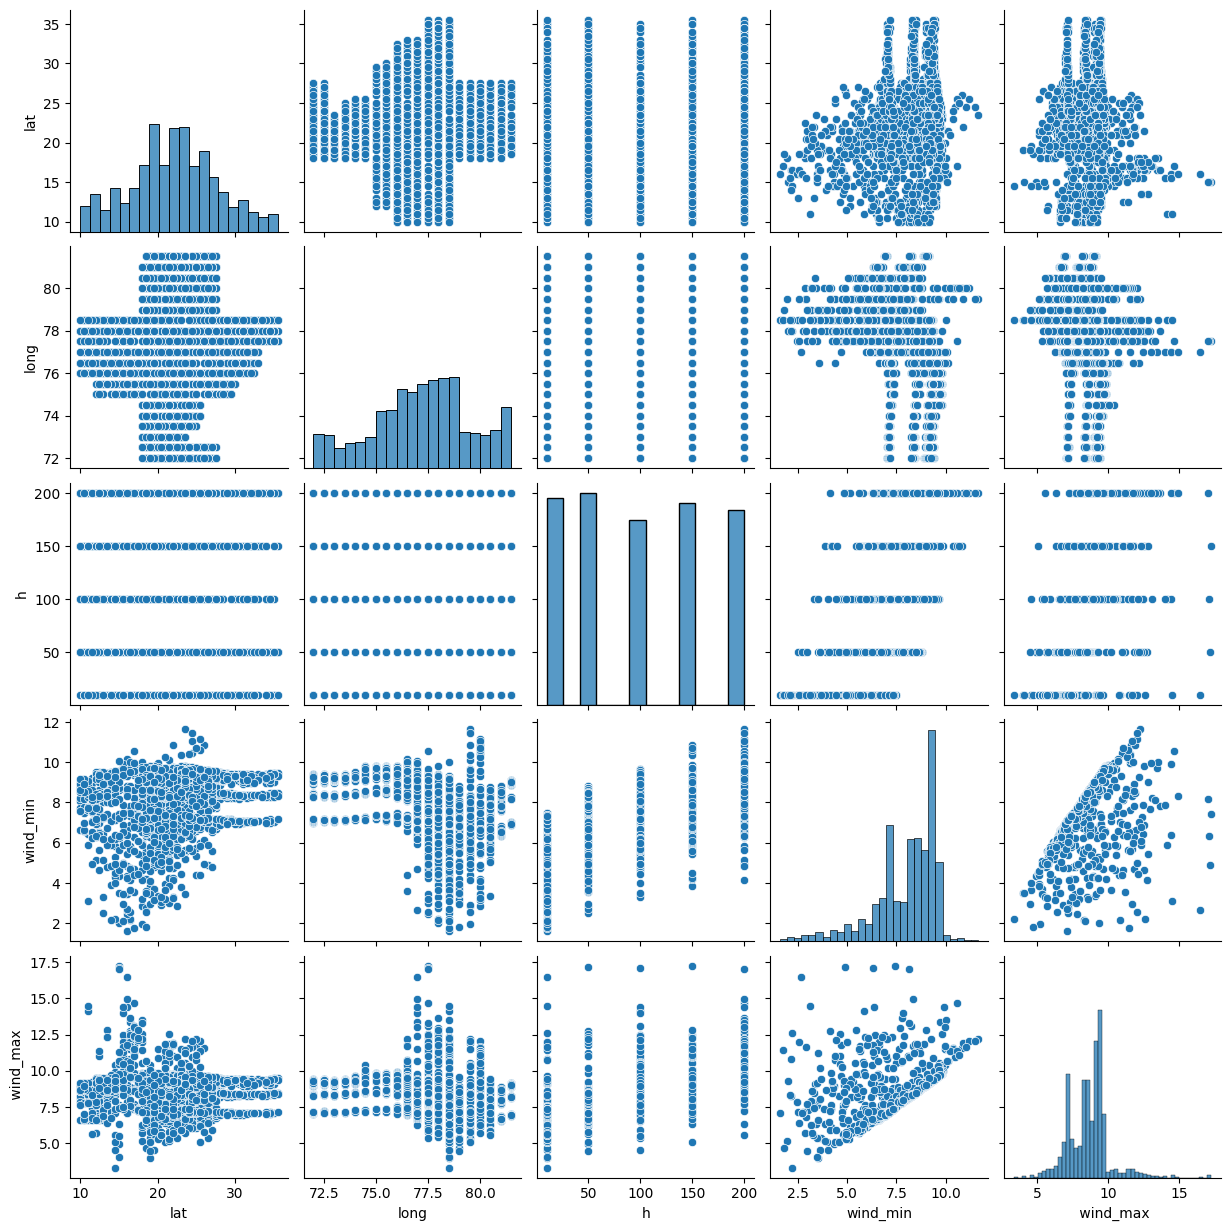

In [6]:
features=df
features=features.drop(columns='power_max')
sns.pairplot(features)

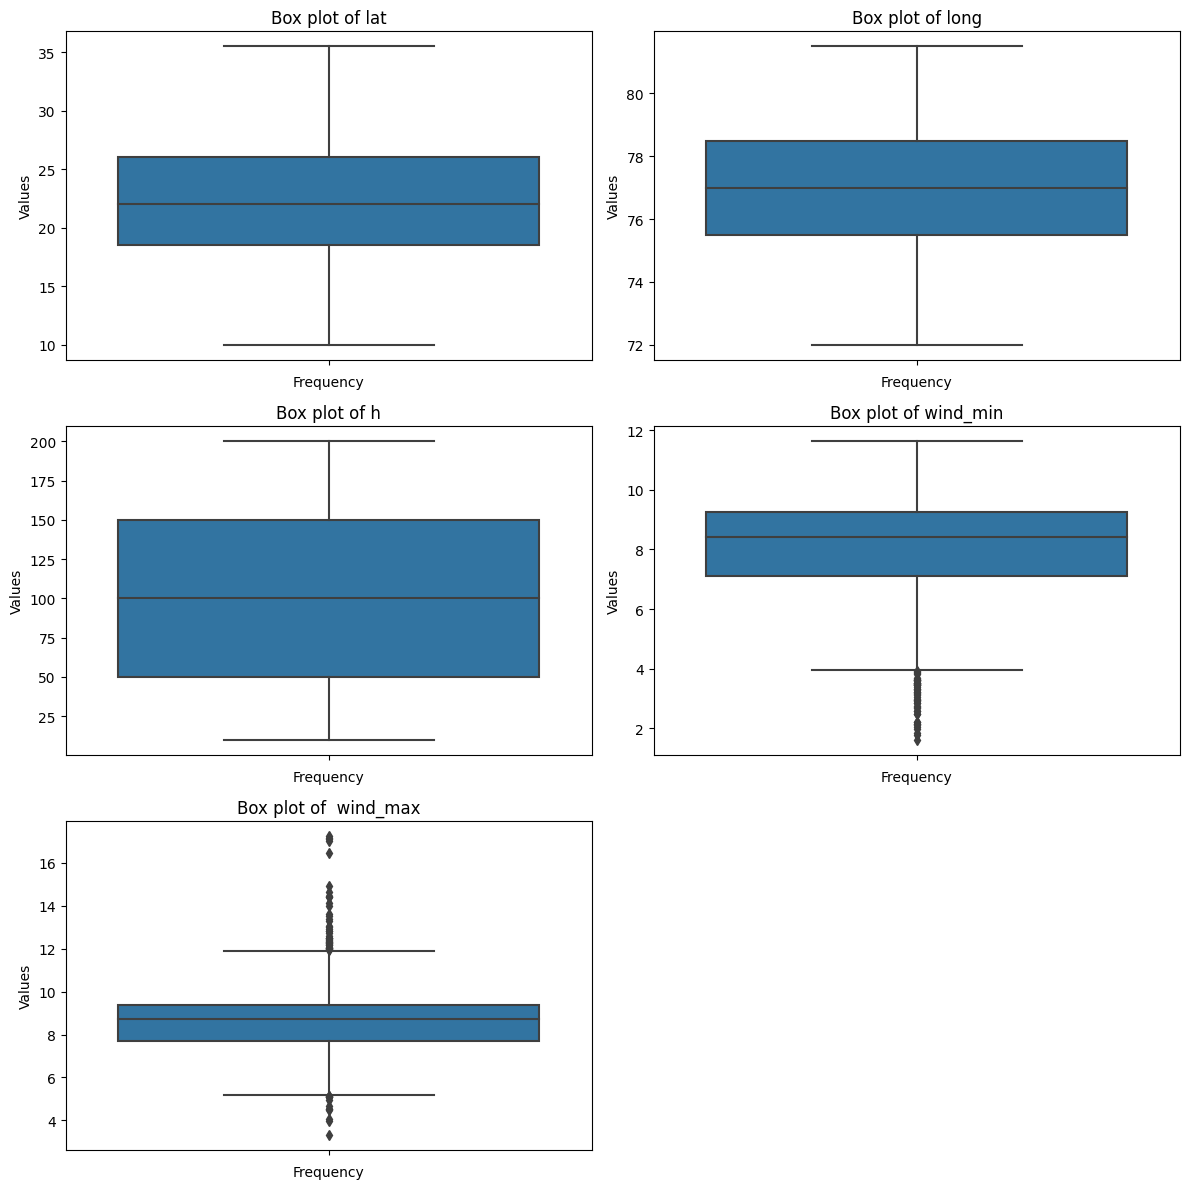

In [9]:
num_cols = len(features.columns)
num_rows = ((num_cols+1) //2) 
fig, axes = plt.subplots(num_rows, 2, figsize=(12, num_rows * 4))
for i, column in enumerate(features.columns):
    row = i // 2
    col = i % 2
    sns.boxplot(ax=axes[row, col],y=df[column])
    axes[row, col].set_title(f'Box plot of {column}')
    axes[row, col].set_xlabel('Frequency')
    axes[row, col].set_ylabel('Values')
if num_cols % 2 != 0:
    fig.delaxes(axes[num_rows - 1, 1])
plt.tight_layout()
plt.show()

In [3]:
df['power_max']=df['power_max'].astype(float)

In [4]:
from geopy.geocoders import Photon
import folium
map=folium.Map()
loc=[]
x=np.array(df['lat'])
y=np.array(df['long'])
z=np.array(df['power_max'])

geolocator = Photon(user_agent="geoapiExercises")

for i in range(len(df)):
    lat=x[i]
    long=y[i]
    map.add_child(folium.Marker(location=[lat,long],popup=str(z[i]),icon=folium.Icon(color='green')))
    location = geolocator.geocode(str(lat)+","+str(long))
    loc.append(location)
map


KeyboardInterrupt: 

In [25]:
df=df.sample(frac=1)
ratio=0.75
data_size=df.shape[0]
train_size=int(data_size*ratio)
validate_size=data_size-train_size
print(train_size)
print(validate_size)



1194
399


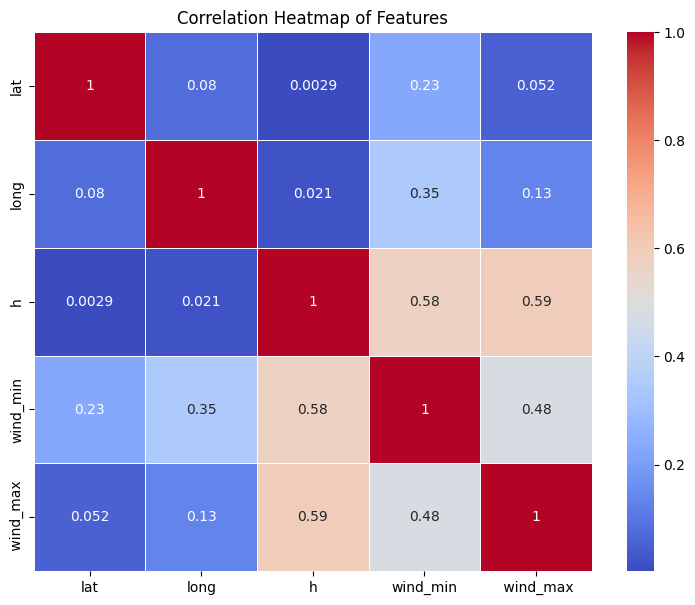

In [25]:
train=df[0:train_size]
x_train=train.drop(columns='power_max')
corr = x_train.corr()
# Generate a heatmap
plt.figure(figsize=(9, 7))
heatmap = sns.heatmap(abs(corr), annot=True, cmap='coolwarm', linewidths=.5)
plt.title('Correlation Heatmap of Features')
plt.show()

In [26]:
y=df['power_max']
mean=y.mean()
std_dev=y.std()

In [12]:
std_scaler = StandardScaler()
scaled_df = std_scaler.fit_transform(df)
scaled_df = pd.DataFrame(scaled_df, columns=df.columns)
scaled_df

,lat,long,h,wind_min,wind_max,power_max
0,0.874603,0.016197,0.726716,0.938232,0.600534,0.096442
1,0.251547,-1.887229,0.726716,0.812886,0.448308,0.028835
2,0.073531,-0.195295,-1.323533,-0.471907,-0.970162,-0.690367
3,0.785595,1.496640,0.726716,0.273900,-0.063725,-0.212843
4,0.162539,-1.675737,-0.005516,0.668738,0.296082,-0.061986
...,...,...,...,...,...,...
1588,-1.973653,0.650672,-1.323533,-3.060295,4.018701,6.575965
1589,1.230635,0.650672,1.458948,0.743946,0.386034,0.107855
1590,-1.528613,-0.618278,0.726716,0.850490,0.510582,0.203373
1591,-0.816549,-0.195295,0.726716,0.725144,0.621292,0.156321


In [13]:
features=scaled_df.drop(columns=['power_max'])
y=scaled_df['power_max']
n_features=features.shape[1]
features

,lat,long,h,wind_min,wind_max
0,0.874603,0.016197,0.726716,0.938232,0.600534
1,0.251547,-1.887229,0.726716,0.812886,0.448308
2,0.073531,-0.195295,-1.323533,-0.471907,-0.970162
3,0.785595,1.496640,0.726716,0.273900,-0.063725
4,0.162539,-1.675737,-0.005516,0.668738,0.296082
...,...,...,...,...,...
1588,-1.973653,0.650672,-1.323533,-3.060295,4.018701
1589,1.230635,0.650672,1.458948,0.743946,0.386034
1590,-1.528613,-0.618278,0.726716,0.850490,0.510582
1591,-0.816549,-0.195295,0.726716,0.725144,0.621292


In [14]:
variance_captured=[]
components=[]
for i in range(1,n_features+1,1):
    pca = PCA(n_components=i)
    pca.fit_transform(features)
    variance_captured.append(sum(pca.explained_variance_ratio_))
    components.append(i)

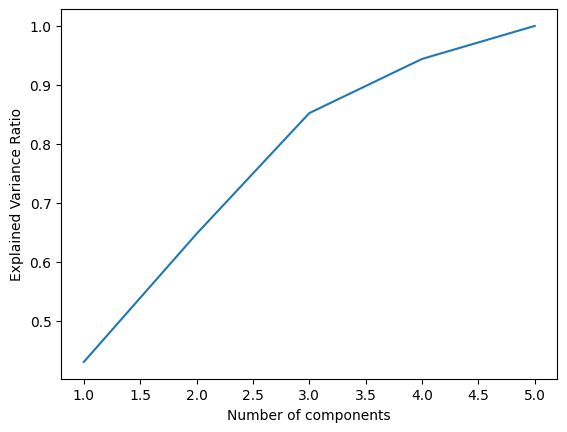

In [15]:
plt.plot(components,variance_captured)
plt.xlabel('Number of components')
plt.ylabel('Explained Variance Ratio')
plt.show()

In [16]:
variance_captured

[0.43066619764318903,
 0.6476454237298586,
 0.8522413841069318,
 0.9440471576033443,
 1.0]

In [22]:
pca = PCA(n_components=4)
reduced_features=pca.fit_transform(features)

In [32]:
print(pca.components_)

[[-1.54383704e-03 -9.35793385e-04  9.99831920e-01  1.34933791e-02
   1.22800802e-02]
 [ 9.97016042e-01  3.06931791e-02  8.13884281e-04  6.92813635e-02
  -1.47095471e-02]
 [ 1.07988018e-02 -9.52635533e-01 -5.96190832e-03  2.87556170e-01
   9.82081040e-02]
 [-2.87194429e-02  2.33781761e-01 -1.67339231e-02  4.88294582e-01
   8.40124787e-01]]


In [21]:
print(sum(pca.explained_variance_ratio_))

1.0


In [23]:
transformed_df=pd.DataFrame(reduced_features)
transformed_df['power_max']=y
transformed_df

,0,1,2,3,power_max
0,-1.320262,-0.851095,-0.255134,0.024145,0.096442
1,-1.593491,-0.046053,1.470651,0.004482,0.028835
2,1.485123,-0.258973,0.769639,0.020597,-0.690367
3,-0.214905,-0.928069,-1.542419,-0.420111,-0.212843
4,-0.959661,-0.050524,1.546068,0.200038,-0.061986
...,...,...,...,...,...
1588,0.636659,3.270656,-1.511508,4.265977,6.575965
1589,-1.371925,-1.194552,-1.066795,-0.349533,0.107855
1590,-1.233948,1.469456,0.353859,-0.559240,0.203373
1591,-1.159838,0.809055,-0.081308,-0.288735,0.156321


In [26]:
train_data=transformed_df[0:train_size]
validate_data=transformed_df[train_size:]
train_data

,0,1,2,3,power_max
0,-1.320262,-0.851095,-0.255134,0.024145,0.096442
1,-1.593491,-0.046053,1.470651,0.004482,0.028835
2,1.485123,-0.258973,0.769639,0.020597,-0.690367
3,-0.214905,-0.928069,-1.542419,-0.420111,-0.212843
4,-0.959661,-0.050524,1.546068,0.200038,-0.061986
...,...,...,...,...,...
1189,3.199054,1.163390,-0.343160,-1.661754,-1.112382
1190,2.271830,0.071506,-1.098301,-0.466913,-0.746001
1191,1.043096,-0.518126,-0.891789,0.160668,-0.151906
1192,2.856098,0.089612,0.423773,-0.451588,-0.960049


In [27]:
X_train = train_data.drop(columns='power_max')
y_train = train_data['power_max']
X_validate = validate_data.drop(columns='power_max')
y_validate = validate_data['power_max']

X_train

,0,1,2,3
0,-1.320262,-0.851095,-0.255134,0.024145
1,-1.593491,-0.046053,1.470651,0.004482
2,1.485123,-0.258973,0.769639,0.020597
3,-0.214905,-0.928069,-1.542419,-0.420111
4,-0.959661,-0.050524,1.546068,0.200038
...,...,...,...,...
1189,3.199054,1.163390,-0.343160,-1.661754
1190,2.271830,0.071506,-1.098301,-0.466913
1191,1.043096,-0.518126,-0.891789,0.160668
1192,2.856098,0.089612,0.423773,-0.451588


c:\Python311\Lib\site-packages\statsmodels\stats\stattools.py:50: RuntimeWarning: invalid value encountered in scalar divide
  dw = np.sum(diff_resids**2, axis=axis) / np.sum(resids**2, axis=axis)


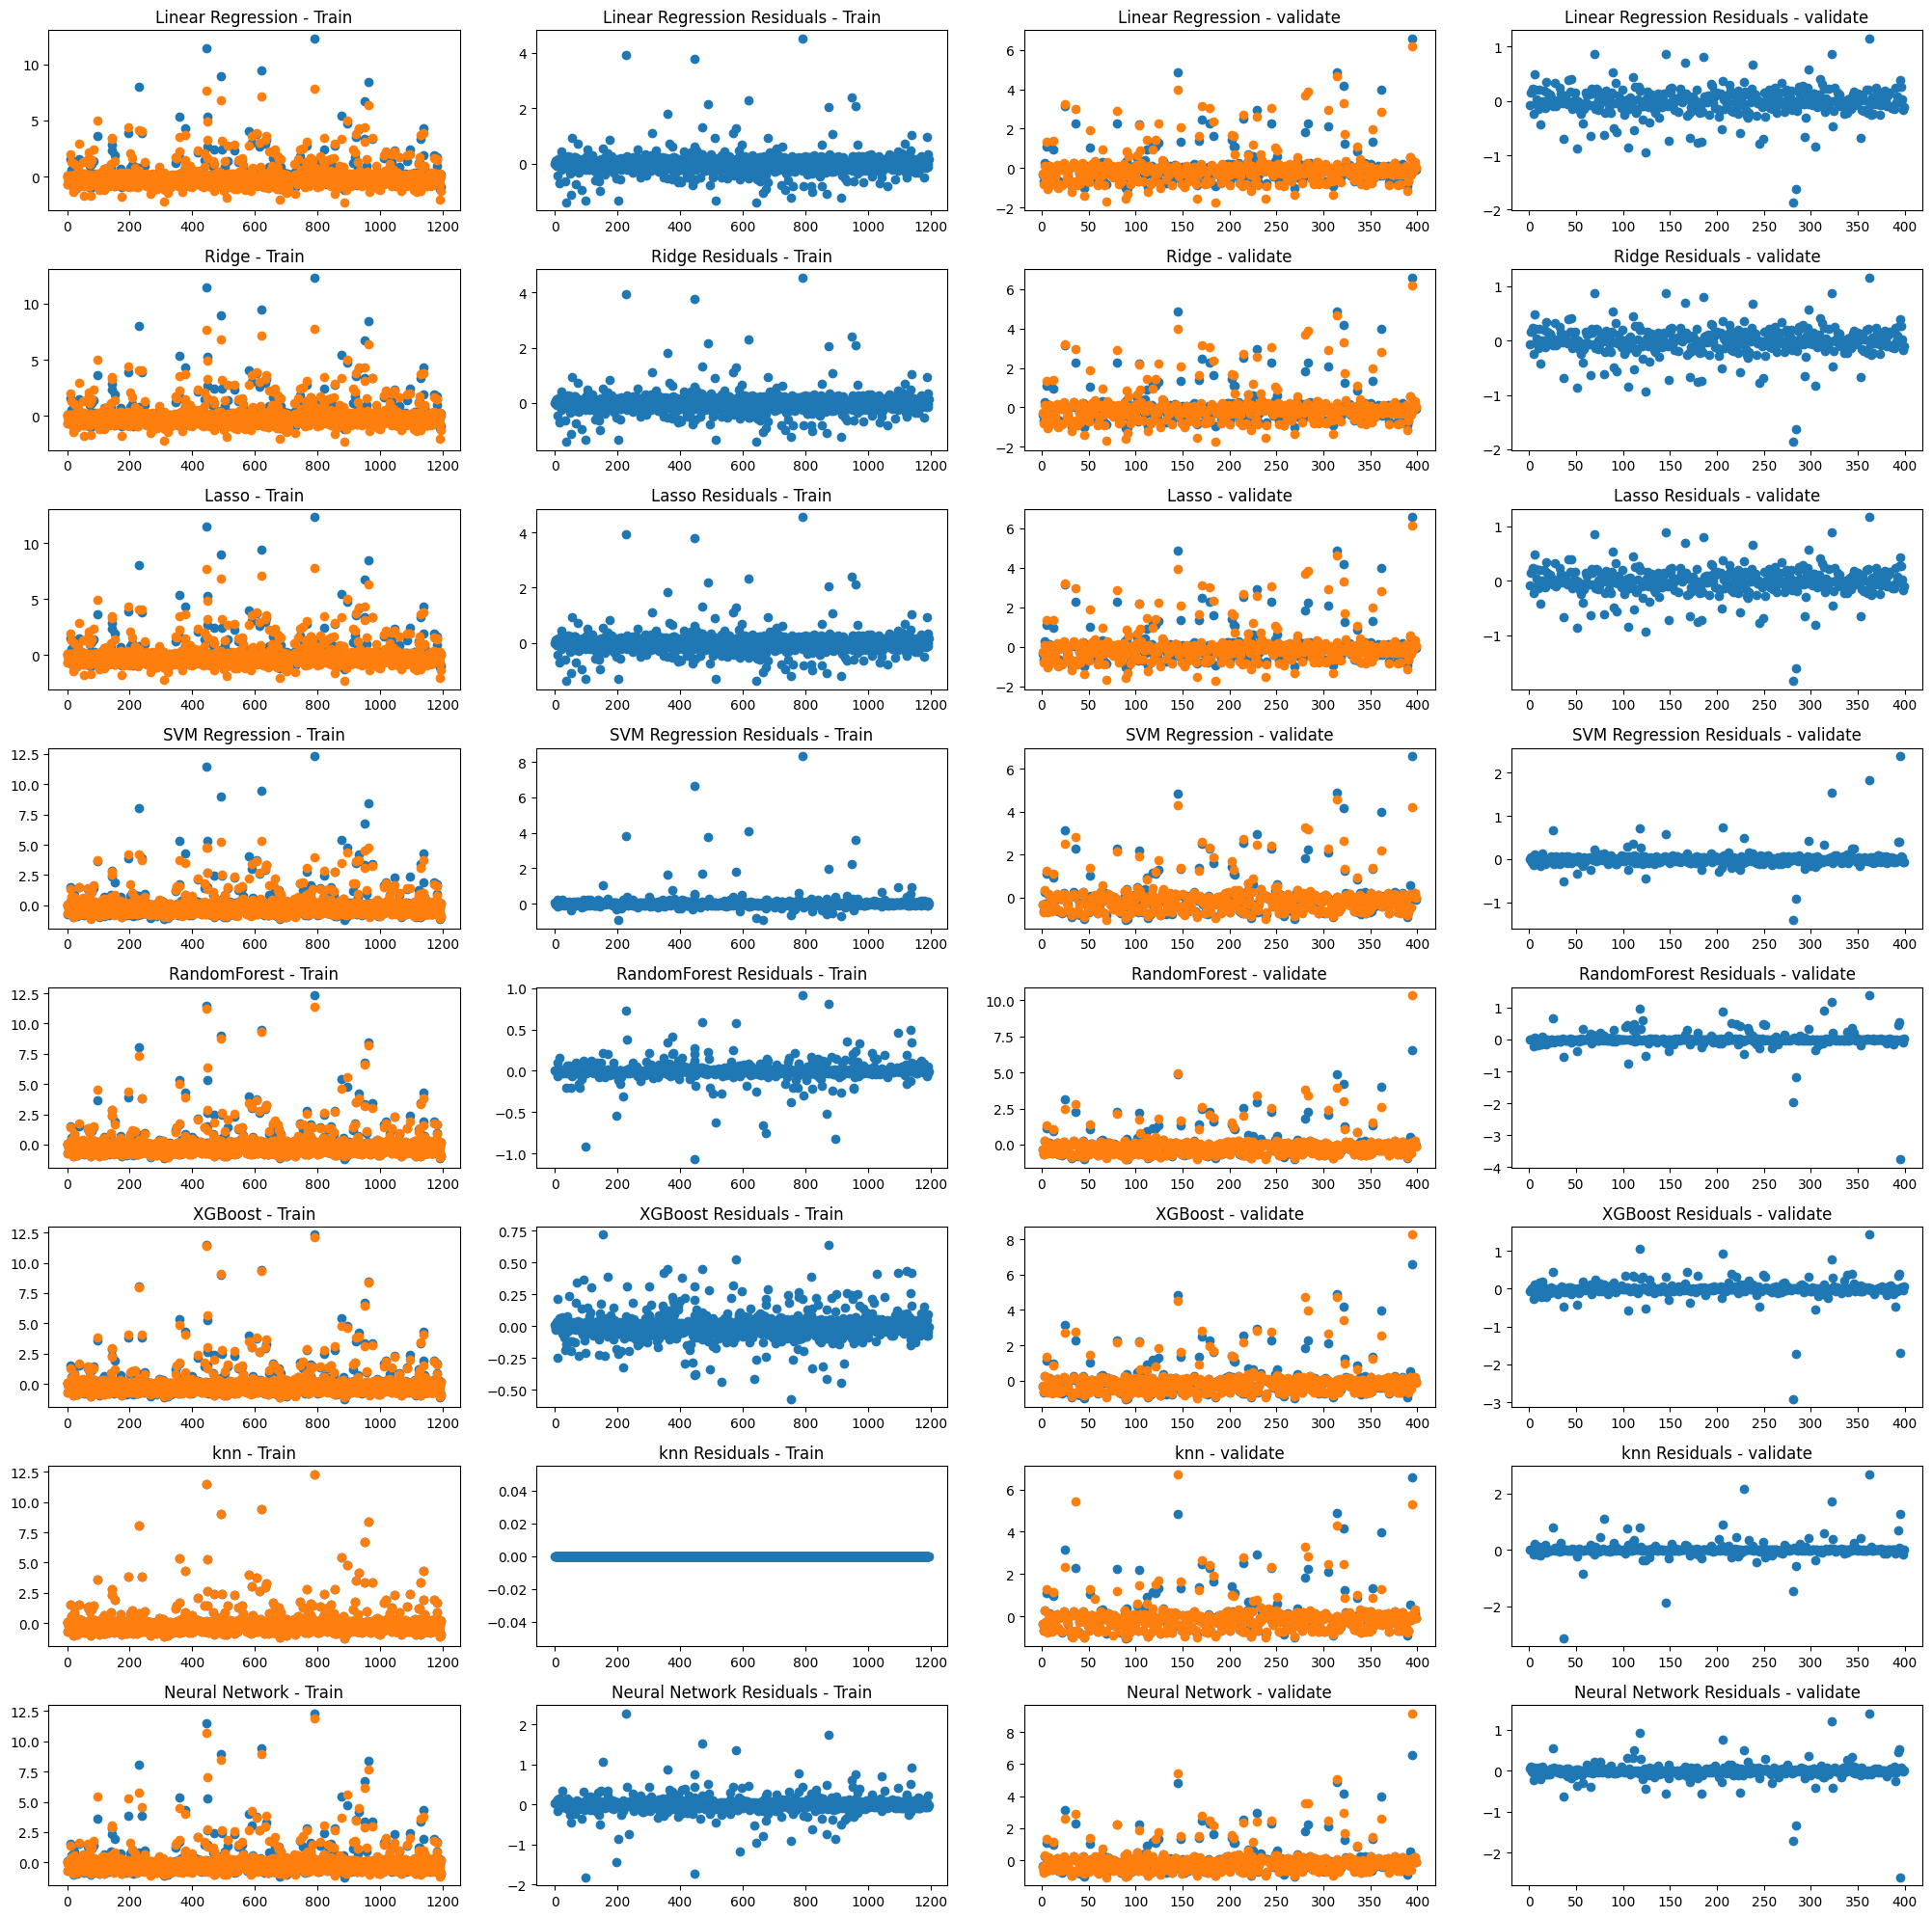

<Figure size 640x480 with 0 Axes>

In [28]:
 
poly=PolynomialFeatures(degree=1)
X_train_poly = poly.fit_transform(X_train)
X_validate_poly=poly.transform(X_validate)


algorithms = {
    'Linear Regression': LinearRegression(),
    'Ridge': Ridge(alpha=1),
    'Lasso': Lasso(alpha=0.0032),
    'SVM Regression': SVR(kernel='rbf',degree=1), 
    'RandomForest': RandomForestRegressor(),
    'XGBoost': GradientBoostingRegressor(),
    'knn': KNeighborsRegressor(weights='distance',n_neighbors=1),
    'Neural Network': MLPRegressor(hidden_layer_sizes=[10,10], max_iter=2000)
}

# Metric tables
metric_table_train = pd.DataFrame()
metric_table_validate=pd.DataFrame()


# Create a grid of subplots 
fig, axs = plt.subplots(len(algorithms),4,figsize=(20,20))
fig_row = -1
x_train=np.linspace(1,train_size,train_size)
x_validate=np.linspace(1,validate_size,validate_size)


# Run the algorithms ... create metrics and plots 
for algorithm_name, algorithm in algorithms.items():
    
    # Train model
    algorithm.fit(X_train_poly, y_train)

    # Train predictions
    y_train_pred = algorithm.predict(X_train_poly)
    
    # validate predictions
    y_validate_pred = algorithm.predict(X_validate_poly)
    
    # Train metrics
    r2_train = algorithm.score(X_train_poly, y_train)
    mse_train = mean_squared_error(y_train, y_train_pred)
    
    # validate metrics
    r2_validate = algorithm.score(X_validate_poly, y_validate)
    mse_validate = mean_squared_error(y_validate, y_validate_pred)

    # Additional metrics using statsmodels for all algorithms
    residuals_train = y_train - y_train_pred
    residuals_validate = y_validate - y_validate_pred
    
    durbin_watson_stat_train = sm.stats.durbin_watson(residuals_train)
    jb_stat_train, jb_p_value_train, _, _ = sm.stats.jarque_bera(residuals_train)
    
    durbin_watson_stat_validate = sm.stats.durbin_watson(residuals_validate)
    jb_stat_validate, jb_p_value_validate, _, _ = sm.stats.jarque_bera(residuals_validate)
    
    # Update metric tables
    metric_table_train.at[algorithm_name, 'R-squared'] = r2_train
    metric_table_train.at[algorithm_name, 'MSE'] = mse_train
    metric_table_train.at[algorithm_name, 'Durbin-Watson'] = durbin_watson_stat_train
    metric_table_train.at[algorithm_name, 'Jarque-Bera'] = jb_stat_train
    metric_table_train.at[algorithm_name, 'JB P-value'] = jb_p_value_train

    metric_table_validate.at[algorithm_name, 'R-squared'] = r2_validate
    metric_table_validate.at[algorithm_name, 'MSE'] = mse_validate
    metric_table_validate.at[algorithm_name, 'Durbin-Watson'] = durbin_watson_stat_validate
    metric_table_validate.at[algorithm_name, 'Jarque-Bera'] = jb_stat_validate
    metric_table_validate.at[algorithm_name, 'JB P-value'] = jb_p_value_validate
    
    fig_row = fig_row+1
    
    axs[fig_row, 0].scatter(x_train, y_train)
    axs[fig_row, 0].scatter(x_train, y_train_pred)
    axs[fig_row, 0].set_title(algorithm_name + " - Train")
    
    axs[fig_row, 1].scatter(x_train, residuals_train)
    axs[fig_row, 1].set_title(algorithm_name + " Residuals - Train")
    
    axs[fig_row, 2].scatter(x_validate, y_validate)
    axs[fig_row, 2].scatter(x_validate, y_validate_pred)
    axs[fig_row, 2].set_title(algorithm_name + " - validate")
    
    axs[fig_row, 3].scatter(x_validate, residuals_validate)
    axs[fig_row, 3].set_title(algorithm_name + " Residuals - validate")
 
    

plt.tight_layout()
plt.show()
plt.tight_layout()
plt.show()

In [29]:
# Display metrics in tables
print("Metrics - Train Data:\n")
print(metric_table_train.to_string())
print("-------------------------------------------------")


print("Metrics - Validate Data:\n")
print(metric_table_validate.to_string())

Metrics - Train Data:

                   R-squared       MSE  Durbin-Watson   Jarque-Bera  JB P-value
Linear Regression   0.875416  0.136874       1.970856  9.791729e+04         0.0
Ridge               0.875415  0.136875       1.970917  9.989782e+04         0.0
Lasso               0.875375  0.136919       1.970401  1.066981e+05         0.0
SVM Regression      0.841898  0.173698       1.940048  2.222780e+06         0.0
RandomForest        0.991036  0.009848       2.011902  8.960132e+04         0.0
XGBoost             0.991551  0.009282       2.069825  5.956381e+03         0.0
knn                 1.000000  0.000000            NaN           NaN         NaN
Neural Network      0.964523  0.038976       1.971538  8.610084e+04         0.0
-------------------------------------------------
Metrics - Validate Data:

                   R-squared       MSE  Durbin-Watson    Jarque-Bera     JB P-value
Linear Regression   0.888078  0.078711       1.930538    1415.606634  4.026476e-308
Ridge        

100%|██████████| 1194/1194 [00:36<00:00, 32.83it/s]


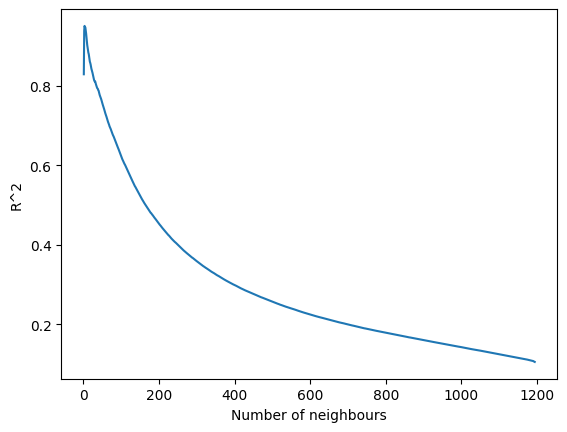

Max R^2 = 0.9506759089128303
Number of neighbours for max R^2 =  3


In [ ]:
r2=[]
for i in tqdm(range(1,train_size+1)):
    model=KNeighborsRegressor(weights='distance',n_neighbors=i)
    model.fit(X_train_poly, y_train)
    y_validate_pred = algorithm.predict(X_validate_poly)
    r2.append(model.score(X_validate_poly, y_validate))
plt.plot(x_train,r2)
plt.xlabel('Number of neighbours')
plt.ylabel('R^2')
plt.show()
print("Max R^2 =",max(r2))
print("Number of neighbours for max R^2 = ",r2.index(max(r2))+1)

100%|██████████| 1000/1000 [00:01<00:00, 777.47it/s]


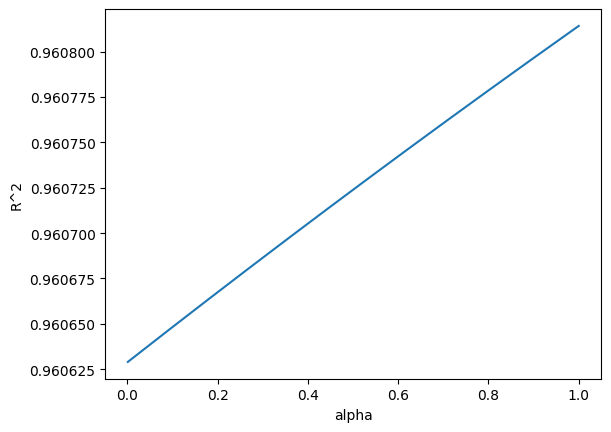

Max R^2 = 0.9608142348190737
alpha for max R^2 =  1.0


In [ ]:
r2=[]
alpha=[]
for i in tqdm(range(1,1001)):
    model=Ridge(alpha=0.001*i)
    model.fit(X_train_poly, y_train)
    y_validate_pred = algorithm.predict(X_validate_poly)
    r2.append(model.score(X_validate_poly, y_validate))
    alpha.append(0.001*i)
plt.plot(alpha,r2)
plt.xlabel('alpha')
plt.ylabel('R^2')
plt.show()
print("Max R^2 =",max(r2))
print("alpha for max R^2 = ",alpha[r2.index(max(r2))])

100%|██████████| 10000/10000 [00:12<00:00, 806.96it/s]


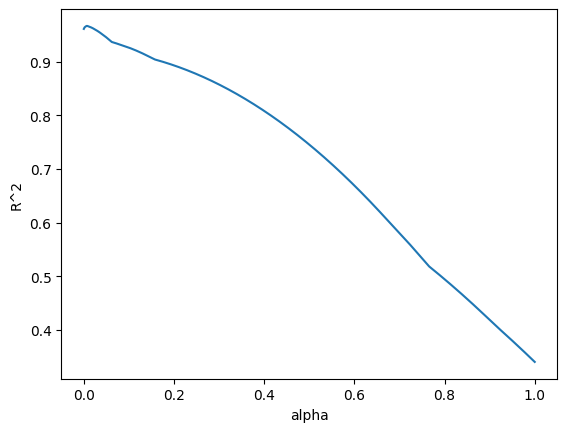

Max R^2 = 0.9664120345242638
alpha for max R^2 =  0.0071


In [ ]:
r2=[]
alpha=[]
for i in tqdm(range(1,10001)):
    model=Lasso(alpha=0.0001*i)
    model.fit(X_train_poly, y_train)
    y_validate_pred = algorithm.predict(X_validate_poly)
    r2.append(model.score(X_validate_poly, y_validate))
    alpha.append(0.0001*i)
plt.plot(alpha,r2)
plt.xlabel('alpha')
plt.ylabel('R^2')
plt.show()
print("Max R^2 =",max(r2))
print("alpha for max R^2 = ",alpha[r2.index(max(r2))])

100%|██████████| 4/4 [00:01<00:00,  3.67it/s]


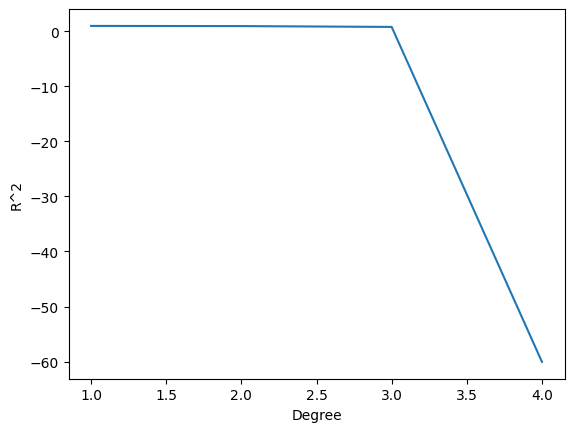

Max R^2 = 0.9635661907351317
Degree for max R^2 =  1


In [ ]:
r2=[]
deg=[]
for i in tqdm(range(1,5)):
    model=SVR(kernel='poly',degree=i)
    model.fit(X_train_poly, y_train)
    y_validate_pred = algorithm.predict(X_validate_poly)
    r2.append(model.score(X_validate_poly, y_validate))
    deg.append(i)
plt.plot(deg,r2)
plt.xlabel('Degree')
plt.ylabel('R^2')
plt.show()
print("Max R^2 =",max(r2))
print("Degree for max R^2 = ",deg[r2.index(max(r2))])

In [ ]:
test_df = pd.read_csv(test_file_path)
test_df=test_df.drop(columns=['elevation'])
copy=test_df
test_df


,lat,long,h,wind_min,wind_max,power_ninth_decile,power_max
0,8.235490,77.550294,10,6.63,6.63,453.24,453.44
1,27.231708,70.303710,200,10.05,11.45,1327.63,1527.98
2,30.825460,78.967529,50,8.18,8.19,715.97,716.19
3,13.070384,80.200195,150,8.01,8.32,748.51,758.53
4,15.621395,73.876465,100,9.16,9.17,959.10,959.95
5,21.824384,70.839844,10,6.86,6.87,465.22,466.15
6,17.668997,79.586060,100,2.92,6.46,578.61,656.03


In [ ]:
y_test=test_df['power_max']
mean=y_test.mean()
std_dev=y_test.std()


In [ ]:
std_scaler = StandardScaler()
scaled_df = std_scaler.fit_transform(test_df)
scaled_df = pd.DataFrame(scaled_df, columns=test_df.columns)
scaled_df

,lat,long,h,wind_min,wind_max,power_ninth_decile,power_max
0,-1.490660,0.424750,-1.194524,-0.360490,-0.931840,-1.032706,-0.989194
1,1.089320,-1.444263,1.694052,1.237683,2.012007,2.012637,2.157973
2,1.577408,0.790278,-0.586403,0.363828,0.020940,-0.117665,-0.219639
3,-0.834007,1.108203,0.933900,0.284387,0.100339,-0.004334,-0.095631
4,-0.487540,-0.522791,0.173749,0.821784,0.619482,0.729114,0.494298
5,0.354922,-1.305985,-1.194524,-0.253011,-0.785258,-0.990982,-0.951968
6,-0.209444,0.949807,0.173749,-2.094181,-1.035669,-0.596065,-0.395838


In [ ]:
test_data=scaled_df
X_test = test_data.drop(columns='power_max')
y_test = test_data['power_max']
reduced_features=pca.transform(X_test)
transformed_df=pd.DataFrame(reduced_features)
transformed_df

,0,1,2,3,4
0,-1.824527,0.998645,0.679732,-0.525594,-0.903955
1,3.690189,-0.965791,0.205568,0.767904,0.766858
2,-0.301681,-1.177021,-1.252615,0.573607,-0.478216
3,0.454536,0.962110,-0.720640,-1.065390,-0.196281
4,1.237270,0.128926,0.611982,0.032258,-0.451580
5,-1.422581,-1.027358,1.290648,0.414441,0.049310
6,-1.833205,1.080489,-0.814675,-0.197227,1.213865


In [20]:
model=LinearRegression()
reg=model.fit(X_train_poly, y_train)
y_test_pred = algorithm.predict(poly.transform(reduced_features))

In [36]:
model=LinearRegression()
reg=model.fit(X_train_poly, y_train)
reg.coef_

array([ 0.        , -0.25383006,  0.38293916, -0.29606317,  1.08066942])

In [21]:
reg.coef_

array([ 0.        , -0.25383006,  0.38293916, -0.29606317,  1.08066942])

In [ ]:
results=pd.DataFrame(reduced_features)
results['power_max']=y_test_pred*std_dev+mean
results

,0,1,2,3,4,power_max
0,-1.824527,0.998645,0.679732,-0.525594,-0.903955,524.760396
1,3.690189,-0.965791,0.205568,0.767904,0.766858,1338.203359
2,-0.301681,-1.177021,-1.252615,0.573607,-0.478216,702.898542
3,0.454536,0.962110,-0.720640,-1.065390,-0.196281,724.137068
4,1.237270,0.128926,0.611982,0.032258,-0.451580,872.666315
5,-1.422581,-1.027358,1.290648,0.414441,0.049310,544.191874
6,-1.833205,1.080489,-0.814675,-0.197227,1.213865,668.934572


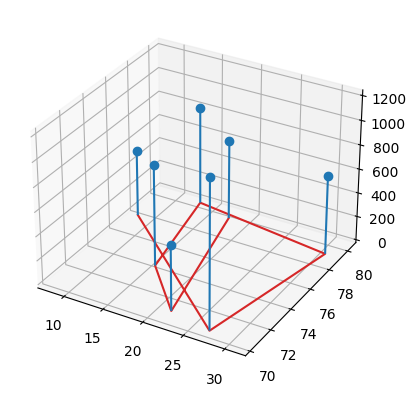

In [ ]:

x = np.array(test_df['lat'])
y =np.array(test_df['long'])
z =np.array(results['power_max'])

fig, ax = plt.subplots(subplot_kw=dict(projection='3d'))
ax.stem(x, y, z)

plt.show()


In [ ]:
from geopy.geocoders import Nominatim
import folium
map=folium.Map()
loc=[]

geolocator = Nominatim(user_agent='myencoder', timeout=10)

test_size=len(test_df)

for i in range(test_size):
    lat=x[i]
    long=y[i]
    map.add_child(folium.Marker(location=[lat,long],popup=str(z[i]),icon=folium.Icon(color='green')))
    location = geolocator.geocode(str(lat)+","+str(long))
    loc.append(location)
map


In [ ]:
import numpy as np
import folium
from folium.plugins import HeatMap


x = x.reshape(test_size, 1)
y = y.reshape(test_size, 1)
z = (z.reshape(test_size, 1)-np.min(z))/(np.max(z)-np.min(z))

heat_data = np.block([[x, y, z]])

India_map = folium.Map(location=[20.5937, 78.9629], zoom_start=5)  
hm = HeatMap(heat_data.tolist())
hm.add_to(India_map)
India_map


In [ ]:
param=pd.read_excel('Test_params.xlsx')
param

,Area,Solar_cost,Wind_cost,Solar_Power,Wind_Power,lat,long
0,401,1.141326e+10,1.331306e+10,785.400514,569.477760,8.235490,77.550294
1,686,1.954698e+10,2.186692e+10,847.213463,1172.791598,27.231708,70.303710
2,735,2.208054e+10,2.544518e+10,761.244742,735.282807,30.825460,78.967529
3,487,1.375784e+10,1.627365e+10,787.282503,761.489126,13.070384,80.200195
4,869,2.274979e+10,2.711702e+10,784.068977,848.454601,15.621395,73.876465
5,679,1.857937e+10,2.218504e+10,856.071358,515.095283,21.824384,70.839844
6,966,2.734503e+10,3.168682e+10,794.626441,650.341881,17.668997,79.586060


In [ ]:
param['Wind_Power']=results['power_max']
param['lat']=copy['lat']
param['long']=copy['long']
param

,Area,Solar_cost,Wind_cost,Solar_Power,Wind_Power,lat,long
0,401,1.141326e+10,1.331306e+10,785.400514,556.117379,8.235490,77.550294
1,686,1.954698e+10,2.186692e+10,847.213463,1219.447398,27.231708,70.303710
2,735,2.208054e+10,2.544518e+10,761.244742,653.097323,30.825460,78.967529
3,487,1.375784e+10,1.627365e+10,787.282503,818.324116,13.070384,80.200195
4,869,2.274979e+10,2.711702e+10,784.068977,835.473152,15.621395,73.876465
5,679,1.857937e+10,2.218504e+10,856.071358,537.515929,21.824384,70.839844
6,966,2.734503e+10,3.168682e+10,794.626441,663.518609,17.668997,79.586060
